### Revisão Redes Neurais

* Redes neurais são algoritmos de aprendizagem de máquina

* Podemos trabalhar com dados estruturados e não estruturados (texto, áudio, imagem)

* Usamos redes neurais multicamada para problemas mais simples sem grandes diversidades, ou para dados estruturados

* Quanto mais simples a base, maior tendência de ter uma arquitetura de rede menor (válido para qualquer abordagem de rede neural)

* Quanto mais complexa, maior necessidade de camadas e neurônios

* Podemos utilizar callbacks para monitorar o desempenho do modelo. Callbacks comuns:
  * [early stopping](https://keras.io/api/callbacks/early_stopping/): enterrompe o treinamento caso a performance na base de validação não melhore
  * [learning rate](https://keras.io/api/callbacks/reduce_lr_on_plateau/): muda a learning rate quando o treinamento não melhora
  * [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/): salva o modelo com melhor performance
* Em caso de overfiting:
  * Teste um modelo mais simples! (reduza camadas e neurônios)
  * Utilize dropout e/ou normalização do batch
  * Adicione data augmentation para melhorar a generalização do modelo
* Em caso de underfiting:
  * Adicione mais camadas e neurônios
  * Teste modelos mais profundos
* [Modelos pré-treinados](https://keras.io/guides/transfer_learning/):
  * Comuns quando não temos bases de dados suficientes para treinamento de um modelo próprio com boa performance
  * Quanto mais diferentes as bases, mais chances de treinar do zero
* Como avaliar e implantar um modelo
  * Modelo com boa performance na base de treino e teste (sem overfiting considerável)
  * [Salva o modelo treinado](https://www.tensorflow.org/guide/keras/save_and_serialize) em arquivo
  * Carrega este arquivo e para cada nova predição realizar um predict
  * Garantir que os preprocessamentos do treino estão sendo realizados da mesma forma

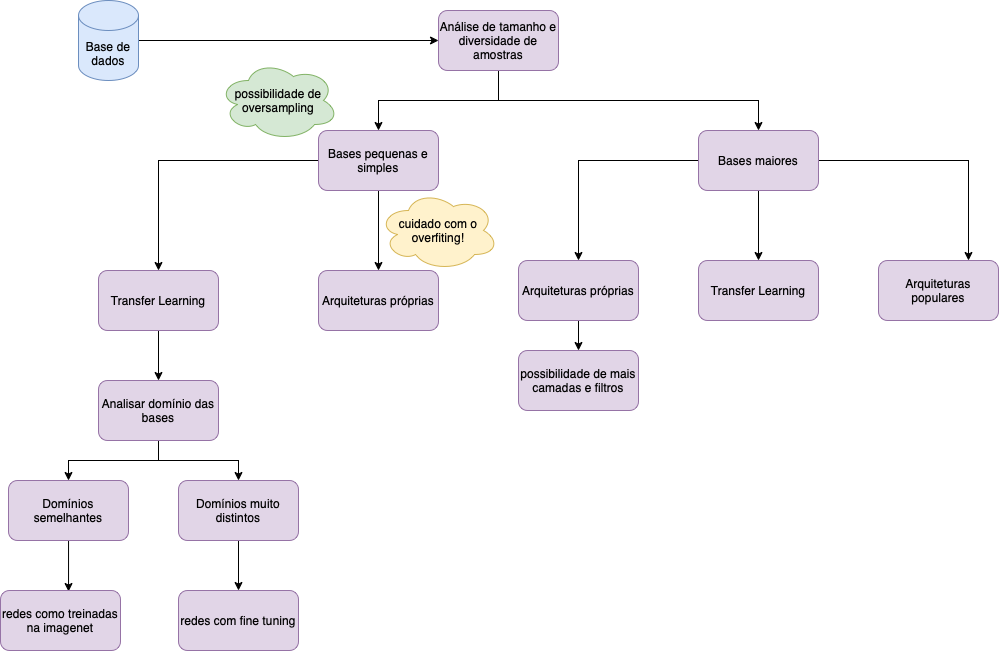

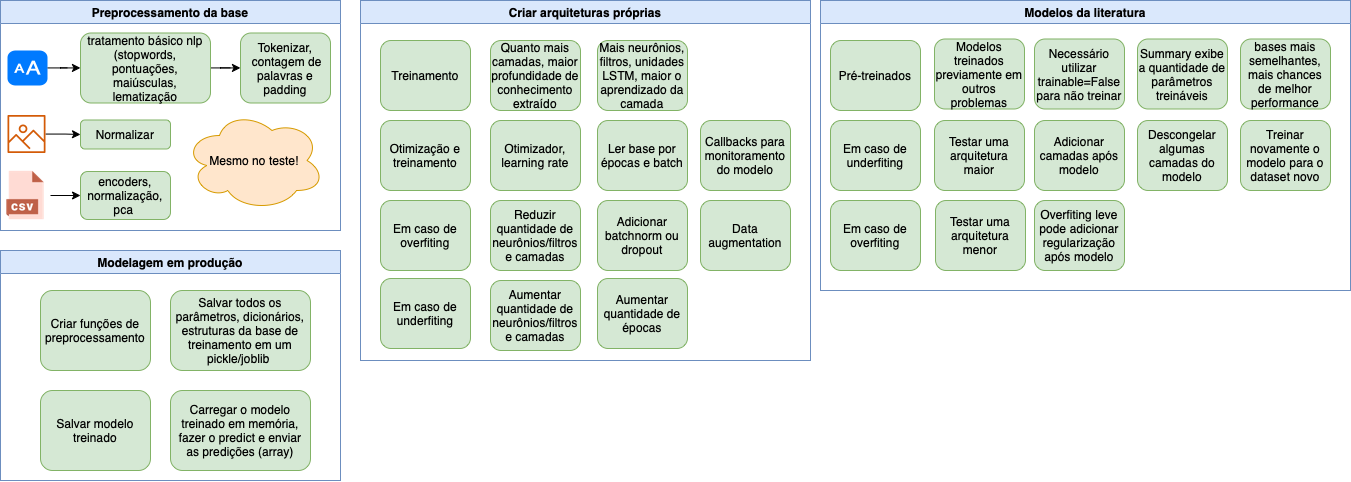

Redes Pré-Treinadas

* Modelos que já foram treinados em um outro contexto

* Lista de modelos disponíveis [aqui](https://keras.io/api/applications/)

* Importamos a arquitetura de rede

* Utilizamos a instrução trainable para controlar o que queremos treinar ou não

In [ ]:
### Redes pré-treinadas

In [1]:
import tensorflow as tf

### Fazer o modelo binário

Uso do flow_from_dataframe

https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c

### Para o projeto!

* Crie um dataframe com duas colunas: id e label
* Leia cada filename da imagem do diretório
* Pegue o rótulo a partir do filename (é um sufixo no filename)
* Coloque o filename e o label no dataframe
* Salve o dataframe como csv e coloque o path desse csv no método flow_from_dataframe

In [ ]:
# Path x-ray chest

path_pneumonia = "../../xray_chest/"

In [5]:
# Puxando os dados de um diretório contendo outros dois diretórios
import tensorflow as tf
from tensorflow.keras.preprocessing import image

## define o generator escalando as imagens do dataset
train_datagen = image.ImageDataGenerator(validation_split=0.2,
                                         rescale=1/255)

### pega as imagens de um dataset
train_dataset = train_datagen.flow_from_directory( '../../xray_chest/',
                                                  target_size=(64, 64), # tamanho da base: pixel por pixel
                                                  batch_size=64, # puxadas por batch
                                                  class_mode='binary', # binario ou categórico
                                                  subset='training',
                                                  shuffle = True)

### pega as imagens de um dataset
val_dataset = train_datagen.flow_from_directory( '../../xray_chest/',
                                                target_size=(64, 64),
                                                batch_size=64,
                                                class_mode='binary',
                                                subset='validation',
                                                shuffle = True)

Found 3216 images belonging to 2 classes.
Found 804 images belonging to 2 classes.


0


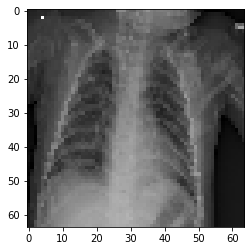

0


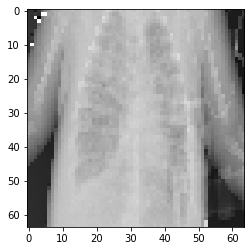

0


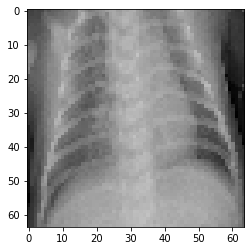

0


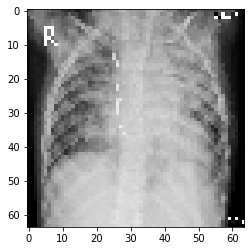

0


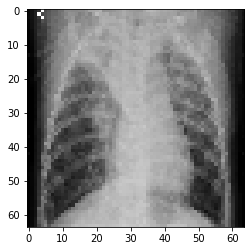

In [6]:
import matplotlib.pyplot as plt
import numpy as np

for _ in range(5):
    img, label = train_dataset.next()
    print(np.argmax(label[0]))
    plt.imshow(img[0])
    plt.show()

In [32]:
#### escolha de uma arquitetura do keras.applications

base_model = tf.keras.applications.ResNet50( weights='imagenet', ### utiliza os pesos da imagenet 
                                            input_shape=(64, 64, 3), # target_size
                                            include_top=False)  ### exclui a camada softmax

In [33]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_11[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [34]:
#### escolha de uma arquitetura do keras.applications
base_model = tf.keras.applications.ResNet50( weights='imagenet', ### utiliza os pesos da imagenet 
                                            input_shape=(64, 64, 3), # target_size
                                            include_top=False)  ### exclui a camada softmax

# Forma não sequencial, o parêntesis no final é a entrada das camadas anteriores

inputs = tf.keras.Input(shape=(64, 64, 3)) # target_size
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# Podemos adicionar mais camadas e regularizações caso desejamos
# x = tf.keras.layers.Dense(100, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

In [35]:
from tensorflow.python.keras.callbacks import EarlyStopping

# EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta = 0.001,
                   patience = 8)

# Compilar
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treinar
model.fit(train_dataset,
          epochs=20, 
          batch_size=64,
          validation_data=val_dataset,
          callbacks=[es])

Epoch 1/20
51/51 [==============================] - 60s 713ms/step - loss: 1.4159 - accuracy: 0.9459 - val_loss: 0.1583 - val_accuracy: 0.9639
Epoch 2/20
51/51 [==============================] - 35s 682ms/step - loss: 0.1585 - accuracy: 0.9639 - val_loss: 0.1565 - val_accuracy: 0.9639
Epoch 3/20
51/51 [==============================] - 36s 714ms/step - loss: 0.1580 - accuracy: 0.9639 - val_loss: 0.1574 - val_accuracy: 0.9639
Epoch 4/20
51/51 [==============================] - 35s 683ms/step - loss: 0.1603 - accuracy: 0.9639 - val_loss: 0.1556 - val_accuracy: 0.9639
Epoch 5/20
51/51 [==============================] - 35s 689ms/step - loss: 0.1568 - accuracy: 0.9639 - val_loss: 0.1556 - val_accuracy: 0.9639
Epoch 6/20
51/51 [==============================] - 35s 688ms/step - loss: 0.1598 - accuracy: 0.9639 - val_loss: 0.1729 - val_accuracy: 0.9639
Epoch 7/20
51/51 [==============================] - 36s 711ms/step - loss: 0.1572 - accuracy: 0.9639 - val_loss: 0.1559 - val_accuracy: 0.9639

### Congelando camadas (base_model.trainable = False)

In [ ]:
base_model.trainable = False # não treina o modelo

base_model.layers[0:30].trainable = False # não treine as 30 primeiras camadas 
base_model.layers[30:].trainable = True # treine as últimas camadas a partir da camada 30

In [37]:
base_model = tf.keras.applications.ResNet50( #### escolha de uma arquitetura do keras.applications
    weights='imagenet', ### utiliza os pesos da imagenet 
    input_shape=(64, 64, 3),
    include_top=False)  ### exclui a camada softmax

# Não treina nos pesos
base_model.trainable=False

inputs = tf.keras.Input(shape=(64, 64, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [38]:
from tensorflow.python.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta = 0.001,
                   patience = 8)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy', # class_mode é 'binary'
              metrics=['accuracy'])

model.fit(train_dataset,
          epochs=20,  
          batch_size=64,
          validation_data=val_dataset,
          callbacks=[es])

Epoch 1/20
51/51 [==============================] - 47s 823ms/step - loss: 0.4453 - accuracy: 0.7817 - val_loss: 0.1879 - val_accuracy: 0.9639
Epoch 2/20
51/51 [==============================] - 35s 687ms/step - loss: 0.1703 - accuracy: 0.9639 - val_loss: 0.1586 - val_accuracy: 0.9639
Epoch 3/20
51/51 [==============================] - 35s 696ms/step - loss: 0.1589 - accuracy: 0.9639 - val_loss: 0.1545 - val_accuracy: 0.9639
Epoch 4/20
51/51 [==============================] - 36s 700ms/step - loss: 0.1557 - accuracy: 0.9639 - val_loss: 0.1525 - val_accuracy: 0.9639
Epoch 5/20
51/51 [==============================] - 34s 674ms/step - loss: 0.1534 - accuracy: 0.9639 - val_loss: 0.1506 - val_accuracy: 0.9639
Epoch 6/20
51/51 [==============================] - 35s 683ms/step - loss: 0.1512 - accuracy: 0.9639 - val_loss: 0.1487 - val_accuracy: 0.9639
Epoch 7/20
51/51 [==============================] - 35s 686ms/step - loss: 0.1488 - accuracy: 0.9639 - val_loss: 0.1468 - val_accuracy: 0.9639

### Salvando o modelo

In [40]:
### em produção
model.save('modelo.h5')
model = tf.keras.models.load_model('modelo.h5')

In [41]:
y_pred = model.predict(val_dataset)

LSTM para Séries Temporais

https://www.tensorflow.org/tutorials/structured_data/time_series

https://neptune.ai/blog/arima-vs-prophet-vs-lstm

---